# Imbalance Data

In [1]:
import pandas as pd
import numpy  as np
import seaborn as SB
import matplotlib.pyplot as PLT
import scipy.stats as STATS
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn import metrics
import random
from sklearn.svm import SVC
from catboost import CatBoostClassifier


/opt/conda/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
n = 10000
skip = sorted(random.sample(range(1,319795),319795-n))
DF = pd.read_csv('../../datasets/heart_2020_cleaned.csv',skiprows=skip).reset_index().rename(columns={'index':'id'})

In [3]:
CatCols = [
    'Smoking','AlcoholDrinking','Stroke','DiffWalking','Sex','AgeCategory','Race','Diabetic',
    'PhysicalActivity','GenHealth','Asthma','KidneyDisease','SkinCancer'
]
NumCols = [
    'BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime'
]

X = DF[DF.columns.difference(['id','HeartDisease'])]
Y = DF['HeartDisease']

In [4]:
X.head()

,AgeCategory,AlcoholDrinking,Asthma,BMI,Diabetic,DiffWalking,GenHealth,KidneyDisease,MentalHealth,PhysicalActivity,PhysicalHealth,Race,Sex,SkinCancer,SleepTime,Smoking,Stroke
0,70-74,No,No,26.26,No,No,Very good,No,2.0,No,5.0,White,Female,No,10.0,No,No
1,80 or older,No,No,24.62,No,No,Good,No,0.0,Yes,5.0,White,Female,No,6.0,No,No
2,65-69,No,Yes,26.61,No,No,Good,No,0.0,Yes,0.0,White,Female,No,12.0,No,No
3,55-59,No,No,34.41,No,No,Good,No,30.0,Yes,0.0,White,Female,No,9.0,No,No
4,70-74,No,No,22.60,No,No,Very good,No,0.0,Yes,0.0,White,Female,No,8.0,Yes,No


# <font color="Brown">BMI :</font>

In [5]:
X['BMI'].describe() 

count    10000.000000
mean        28.260899
std          6.320833
min         13.560000
25%         24.030000
50%         27.260000
75%         31.380000
max         93.860000
Name: BMI, dtype: float64

In [6]:
# normal range 10 ~ 50

In [7]:
X[X['BMI']<=50].groupby(['Sex'])['BMI'].describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
Female,5085.0,27.787746,6.219946,13.73,23.23,26.63,31.25,49.61
Male,4844.0,28.343499,5.381595,13.56,24.41,27.41,31.24,49.92


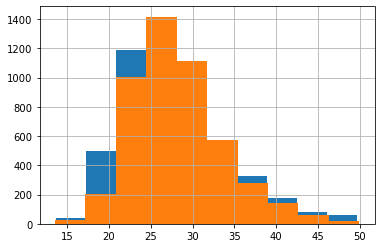

In [8]:
BMI_Normal_Range = X[X['BMI']<=50]
BMI_Normal_Range.groupby(['Sex'])['BMI'].hist()
PLT.show()

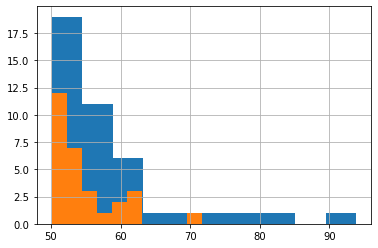

In [9]:
BMI_Out_Of_Range = X[X['BMI']>50]
BMI_Out_Of_Range.groupby(['Sex'])['BMI'].hist()
PLT.show()

In [10]:
# Drop rows with out of rage BMI
X = X.drop(BMI_Out_Of_Range.index,errors='ignore')

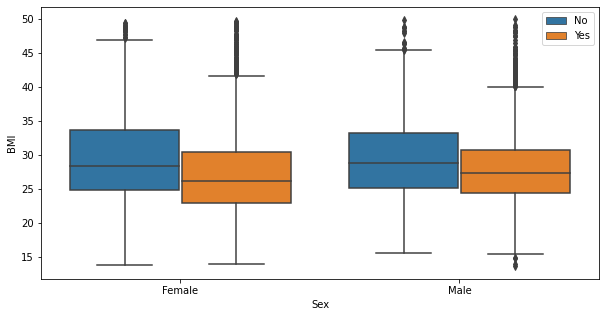

In [11]:
PLT.figure(figsize=(10,5))
SB.boxplot(x=X['Sex'],y=X['BMI'], hue=X['PhysicalActivity']).legend(loc='upper right')

# <font color="Brown">AlcoholDrinking :</font>

In [12]:
X['AlcoholDrinking'].describe()

count     9929
unique       2
top         No
freq      9276
Name: AlcoholDrinking, dtype: object

In [13]:
X['AlcoholDrinking'].value_counts()

No     9276
Yes     653
Name: AlcoholDrinking, dtype: int64

# <font color="Brown">AgeCategory :</font>

In [14]:
X['AgeCategory'].describe()

count      9929
unique       13
top       60-64
freq       1064
Name: AgeCategory, dtype: object

In [15]:
X['AgeCategory'].value_counts()

60-64          1064
65-69          1037
70-74           943
55-59           898
50-54           788
80 or older     775
18-24           672
75-79           668
45-49           658
40-44           646
35-39           644
30-34           600
25-29           536
Name: AgeCategory, dtype: int64

In [16]:
_1 = X[X['AgeCategory']!='80 or older']['AgeCategory'].str.split('-').apply(
    lambda x : (int(x[0])+int(x[1]))/2
)
_2 = X[X['AgeCategory']=='80 or older']['AgeCategory'].str.split(' or ').apply(
    lambda x : 80
)
X.loc[_1.index,'AgeCategory'] = _1
X.loc[_2.index,'AgeCategory'] = _2
del _1,_2

In [17]:
X['AgeCategory'] = X['AgeCategory'].astype(np.int64) 

In [18]:
X['AgeCategory'].describe()

count    9929.000000
mean       54.246248
std        17.843890
min        21.000000
25%        42.000000
50%        57.000000
75%        67.000000
max        80.000000
Name: AgeCategory, dtype: float64

<AxesSubplot:>

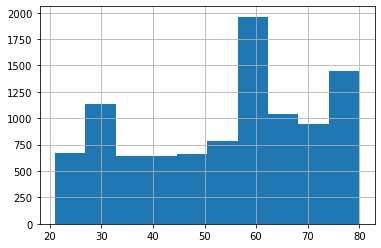

In [19]:
X['AgeCategory'].hist()

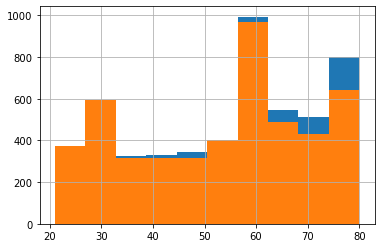

In [20]:
X.groupby(['Sex'])['AgeCategory'].hist()
PLT.show()

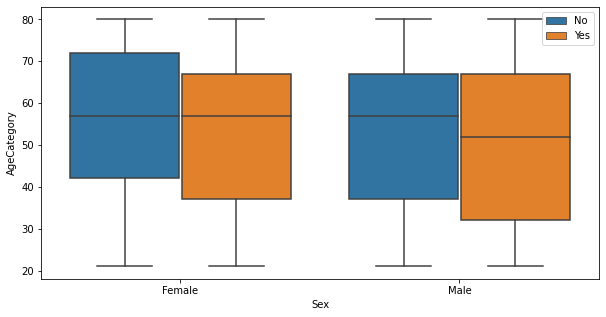

In [21]:
PLT.figure(figsize=(10,5))
SB.boxplot(x=X['Sex'],y=X['AgeCategory'], hue=X['Asthma']).legend(loc='upper right')

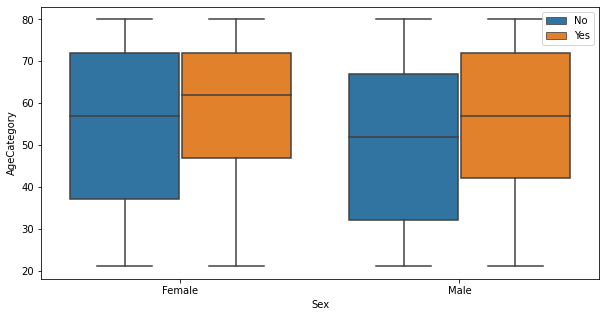

In [22]:
PLT.figure(figsize=(10,5))
SB.boxplot(x=X['Sex'],y=X['AgeCategory'], hue=X['Smoking']).legend(loc='upper right')

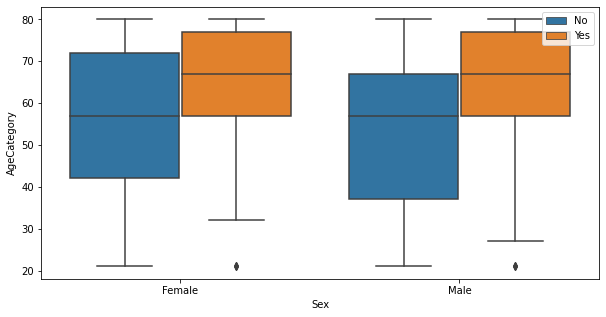

In [23]:
PLT.figure(figsize=(10,5))
SB.boxplot(x=X['Sex'],y=X['AgeCategory'], hue=X['Stroke']).legend(loc='upper right')

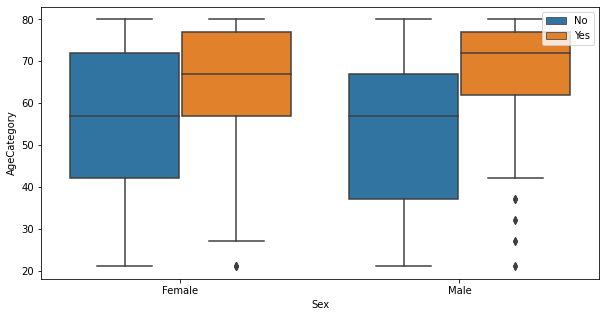

In [24]:
PLT.figure(figsize=(10,5))
SB.boxplot(x=X['Sex'],y=X['AgeCategory'], hue=X['KidneyDisease']).legend(loc='upper right')

In [25]:
CatCols = [
    'Smoking','AlcoholDrinking','Stroke','DiffWalking','Sex','Race','Diabetic',
    'PhysicalActivity','GenHealth','Asthma','KidneyDisease','SkinCancer'
]
NumCols = [
    'BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime','AgeCategory'
]

# <font color="Brown">Asthma :</font>

In [26]:
DF['Asthma'].value_counts()

No     8687
Yes    1313
Name: Asthma, dtype: int64

In [27]:
DF['Asthma'].describe()

count     10000
unique        2
top          No
freq       8687
Name: Asthma, dtype: object

In [28]:
DF['Asthma'].isnull().sum()

0

# <font color="Brown">Diabetic :</font>

In [29]:
X['Diabetic'].value_counts()

No                         8394
Yes                        1264
No, borderline diabetes     185
Yes (during pregnancy)       86
Name: Diabetic, dtype: int64

In [30]:
X['Diabetic'].isnull().sum()

0

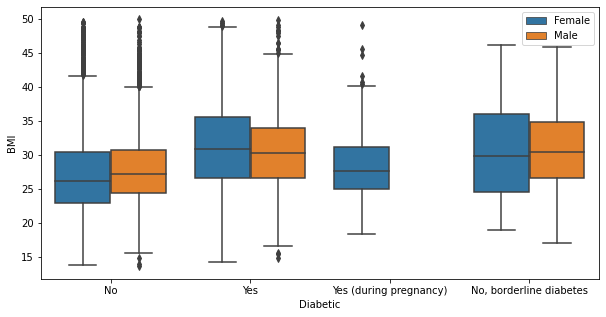

In [31]:
PLT.figure(figsize=(10,5))
SB.boxplot(x=X['Diabetic'],y=X['BMI'], hue=X['Sex']).legend(loc='upper right')

# <font color="Brown">DiffWalking :</font>

In [32]:
X['DiffWalking'].value_counts()

No     8586
Yes    1343
Name: DiffWalking, dtype: int64

In [33]:
X['DiffWalking'].isnull().sum()

0

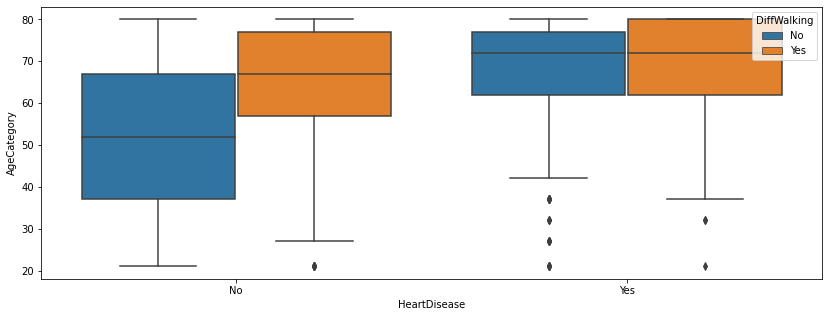

In [34]:
PLT.figure(figsize=(14,5))
SB.boxplot(x=Y,y=X['AgeCategory'], hue=X['DiffWalking']).legend(loc='upper right',title='DiffWalking')

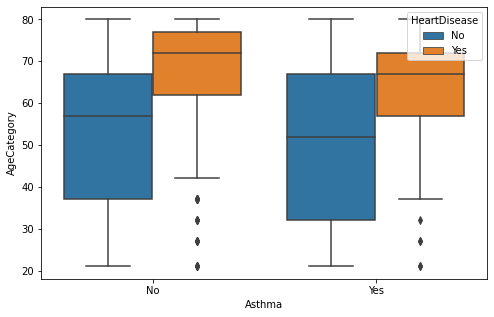

In [35]:
PLT.figure(figsize=(8,5))
SB.boxplot(x=X['Asthma'],y=X['AgeCategory'], hue=Y).legend(loc='upper right',title='HeartDisease')

# <font color="Brown">GenHealth :</font>

In [36]:
X['GenHealth'].describe()

count          9929
unique            5
top       Very good
freq           3506
Name: GenHealth, dtype: object

In [37]:
X['GenHealth'].isnull().sum()

0

In [38]:
X['GenHealth'].value_counts()

Very good    3506
Good         2844
Excellent    2137
Fair         1106
Poor          336
Name: GenHealth, dtype: int64

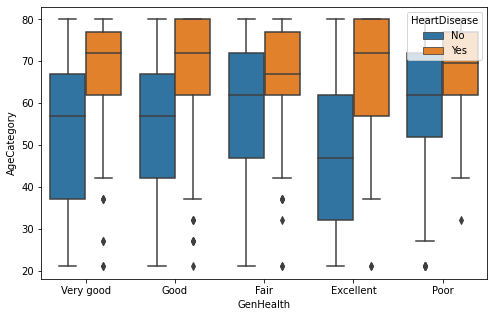

In [39]:
PLT.figure(figsize=(8,5))
SB.boxplot(x=X['GenHealth'],y=X['AgeCategory'], hue=Y).legend(loc='upper right',title='HeartDisease')

# <font color="Brown">KidneyDisease :</font>

In [40]:
X['KidneyDisease'].describe()

count     9929
unique       2
top         No
freq      9577
Name: KidneyDisease, dtype: object

In [41]:
X['KidneyDisease'].isnull().sum()

0

In [42]:
X['KidneyDisease'].value_counts()

No     9577
Yes     352
Name: KidneyDisease, dtype: int64

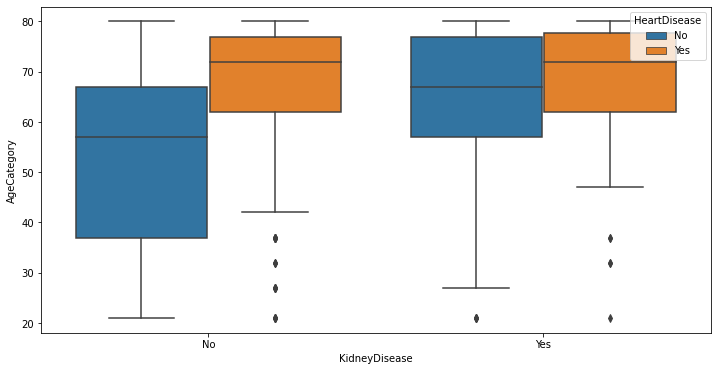

In [43]:
PLT.figure(figsize=(12,6))
SB.boxplot(x=X['KidneyDisease'],y=X['AgeCategory'], hue=Y).legend(loc='upper right',title='HeartDisease')

# <font color="Brown">MentalHealth :</font>

In [44]:
X['MentalHealth'].describe()

count    9929.000000
mean        3.970088
std         8.015698
min         0.000000
25%         0.000000
50%         0.000000
75%         3.000000
max        30.000000
Name: MentalHealth, dtype: float64

In [45]:
X['MentalHealth'].isna().sum()

0

In [46]:
X['MentalHealth'].value_counts().sort_index()

0.0     6340
1.0      292
2.0      509
3.0      314
4.0      158
5.0      446
6.0       44
7.0      184
8.0       39
9.0       10
10.0     332
11.0       2
12.0      29
13.0       3
14.0      76
15.0     306
16.0       9
17.0       1
18.0       5
20.0     160
21.0      19
22.0       3
23.0       1
24.0       3
25.0      60
26.0       2
27.0       7
28.0      13
29.0       8
30.0     554
Name: MentalHealth, dtype: int64

<AxesSubplot:>

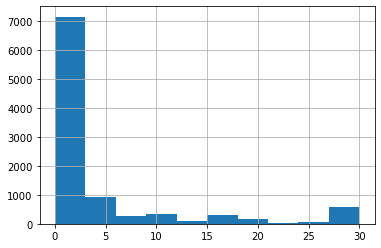

In [47]:
X['MentalHealth'].hist()

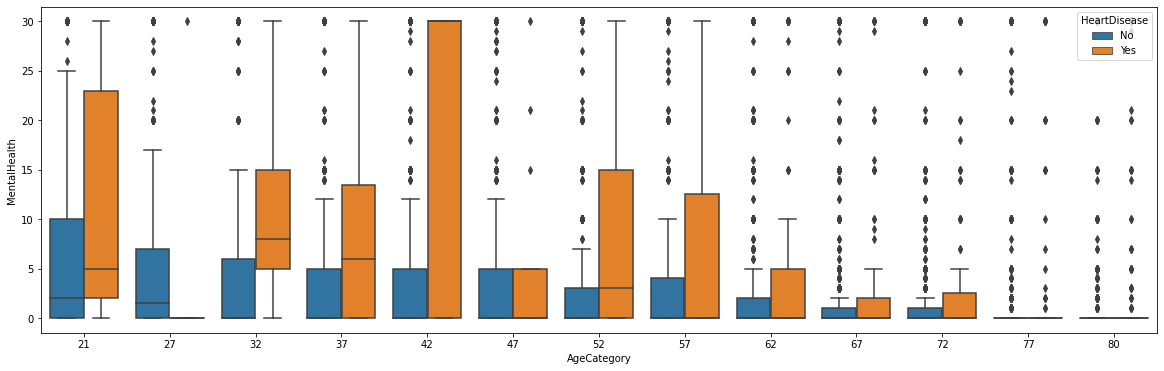

In [48]:
PLT.figure(figsize=(20,6))
SB.boxplot(y=X['MentalHealth'],x=X['AgeCategory'], hue=Y).legend(loc='upper right',title='HeartDisease')

# <font color="Brown">PhysicalActivity :</font>

In [49]:
X['PhysicalActivity'].describe()

count     9929
unique       2
top        Yes
freq      7736
Name: PhysicalActivity, dtype: object

In [50]:
X['PhysicalActivity'].isna().sum()

0

In [51]:
X['PhysicalActivity'].value_counts().sort_index()

No     2193
Yes    7736
Name: PhysicalActivity, dtype: int64

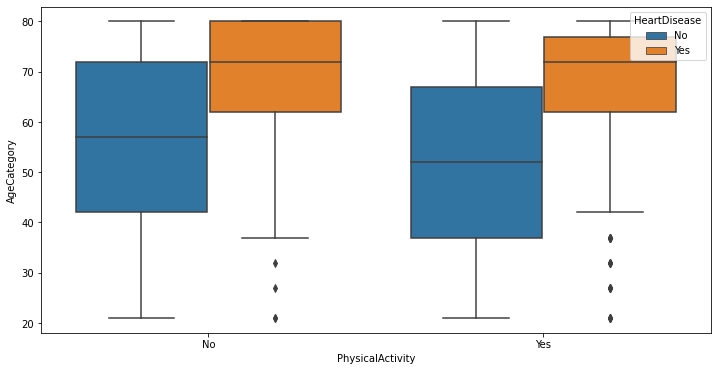

In [52]:
PLT.figure(figsize=(12,6))
SB.boxplot(x=X['PhysicalActivity'],y=X['AgeCategory'], hue=Y).legend(loc='upper right',title='HeartDisease')

# <font color="Brown">PhysicalHealth :</font>

In [53]:
X['PhysicalHealth'].describe()

count    9929.000000
mean        3.477188
std         8.109464
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max        30.000000
Name: PhysicalHealth, dtype: float64

In [54]:
X['PhysicalHealth'].isna().sum()

0

In [55]:
X['PhysicalHealth'].value_counts().sort_index()

0.0     6994
1.0      311
2.0      472
3.0      267
4.0      154
5.0      238
6.0       45
7.0      143
8.0       32
9.0        5
10.0     158
11.0       2
12.0      16
13.0       5
14.0     100
15.0     157
16.0       2
17.0       1
18.0       4
19.0       1
20.0      97
21.0      12
22.0       2
23.0       3
25.0      32
26.0       2
27.0       3
28.0      11
29.0       9
30.0     651
Name: PhysicalHealth, dtype: int64

<AxesSubplot:>

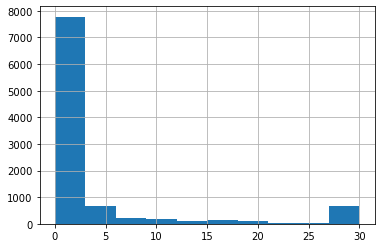

In [56]:
X['PhysicalHealth'].hist()

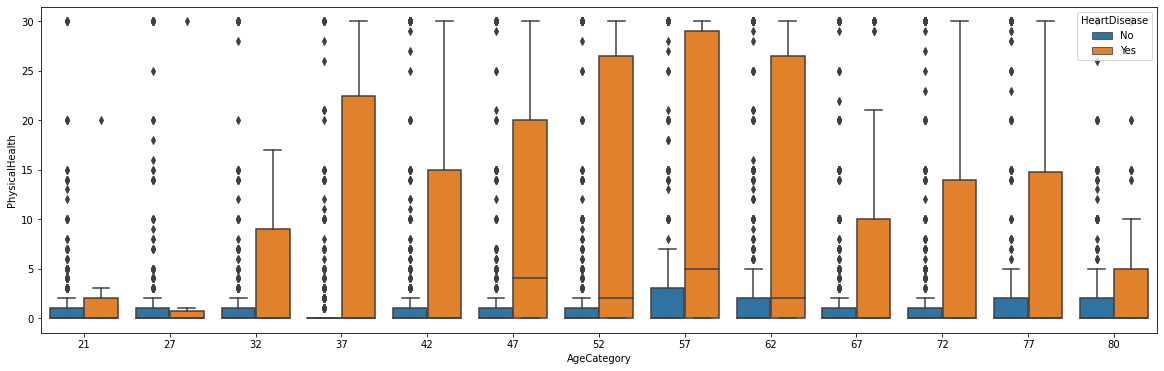

In [57]:
PLT.figure(figsize=(20,6))
SB.boxplot(y=X['PhysicalHealth'],x=X['AgeCategory'], hue=Y).legend(loc='upper right',title='HeartDisease')

# <font color="Brown">Race :</font>

In [58]:
X['Race'].describe()

count      9929
unique        6
top       White
freq       7579
Name: Race, dtype: object

In [59]:
X['Race'].isnull().sum()

0

In [60]:
X['Race'].value_counts()

White                             7579
Hispanic                           859
Black                              706
Other                              339
Asian                              267
American Indian/Alaskan Native     179
Name: Race, dtype: int64

# <font color="Brown">Race :</font>

In [61]:
X['Sex'].describe()

count       9929
unique         2
top       Female
freq        5085
Name: Sex, dtype: object

In [62]:
X['Sex'].isnull().sum()

0

In [63]:
X['Sex'].value_counts()

Female    5085
Male      4844
Name: Sex, dtype: int64

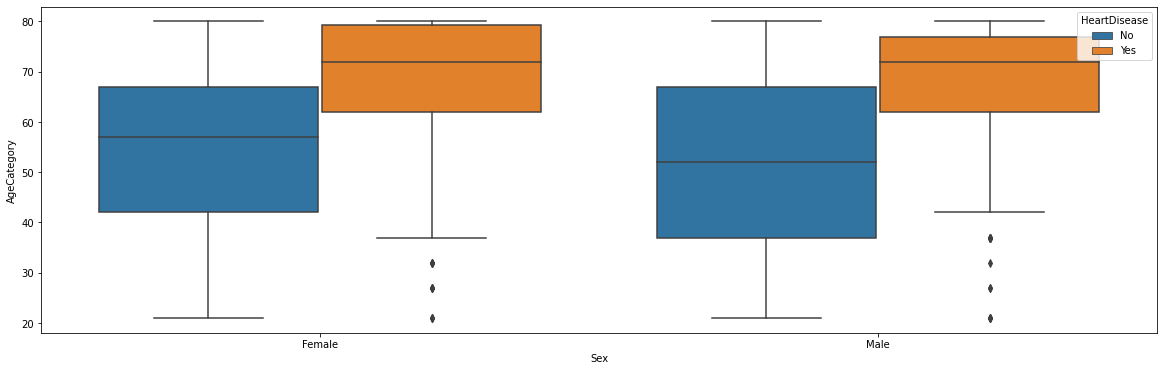

In [64]:
PLT.figure(figsize=(20,6))
SB.boxplot(x=X['Sex'],y=X['AgeCategory'], hue=Y).legend(loc='upper right',title='HeartDisease')

# <font color="Brown">Sex :</font>

In [65]:
X['Sex'].describe()

count       9929
unique         2
top       Female
freq        5085
Name: Sex, dtype: object

In [66]:
X['Sex'].isnull().sum()

0

In [67]:
X['Sex'].value_counts()

Female    5085
Male      4844
Name: Sex, dtype: int64

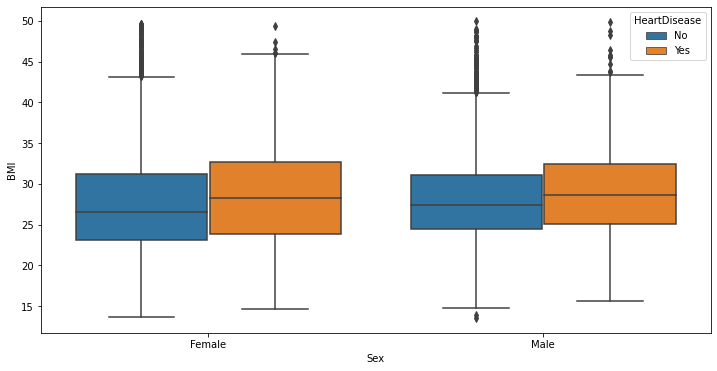

In [68]:
PLT.figure(figsize=(12,6))
SB.boxplot(x=X['Sex'],y=X['BMI'], hue=Y).legend(loc='upper right',title='HeartDisease')

# <font color="Brown">SkinCancer :</font>

In [69]:
X['SkinCancer'].describe()

count     9929
unique       2
top         No
freq      9045
Name: SkinCancer, dtype: object

In [70]:
X['SkinCancer'].isnull().sum()

0

In [71]:
X['SkinCancer'].value_counts()

No     9045
Yes     884
Name: SkinCancer, dtype: int64

# <font color="Brown">SkinCancer :</font>

In [72]:
X['SkinCancer'].describe()

count     9929
unique       2
top         No
freq      9045
Name: SkinCancer, dtype: object

In [73]:
X['SkinCancer'].isnull().sum()

0

In [74]:
X['SkinCancer'].value_counts()

No     9045
Yes     884
Name: SkinCancer, dtype: int64

# <font color="Brown">SleepTime :</font>

In [75]:
X['SleepTime'].describe()

count    9929.000000
mean        7.120657
std         1.470001
min         1.000000
25%         6.000000
50%         7.000000
75%         8.000000
max        23.000000
Name: SleepTime, dtype: float64

In [76]:
X['SleepTime'].isna().sum()

0

<AxesSubplot:>

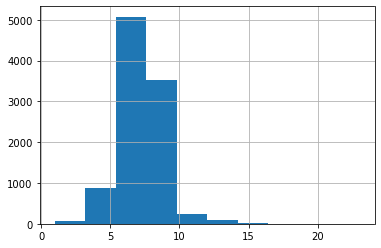

In [77]:
X['SleepTime'].hist()

In [78]:
X = X.drop(X[X['SleepTime']>16]['SleepTime'].index,axis=0)

<AxesSubplot:>

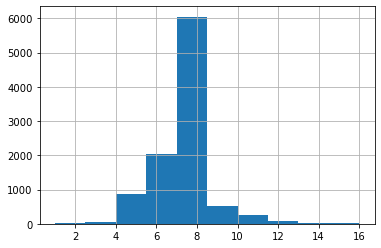

In [79]:
X['SleepTime'].hist()

# <font color="Brown">Smoking :</font>

In [80]:
X['Smoking'].describe()

count     9921
unique       2
top         No
freq      5855
Name: Smoking, dtype: object

In [81]:
X['Smoking'].isnull().sum()

0

In [82]:
X['Smoking'].value_counts()

No     5855
Yes    4066
Name: Smoking, dtype: int64

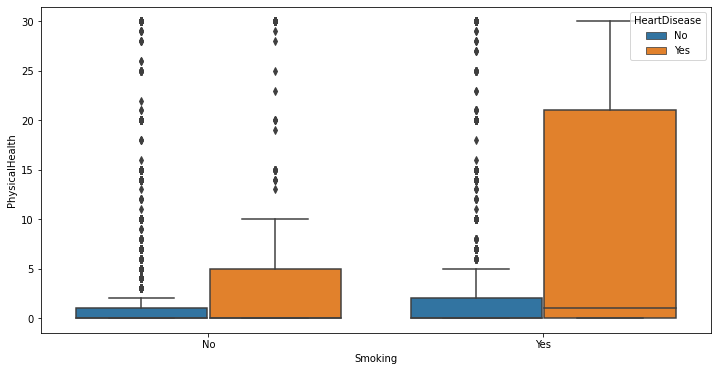

In [83]:
PLT.figure(figsize=(12,6))
SB.boxplot(x=X['Smoking'],y=X['PhysicalHealth'], hue=Y).legend(loc='upper right',title='HeartDisease')

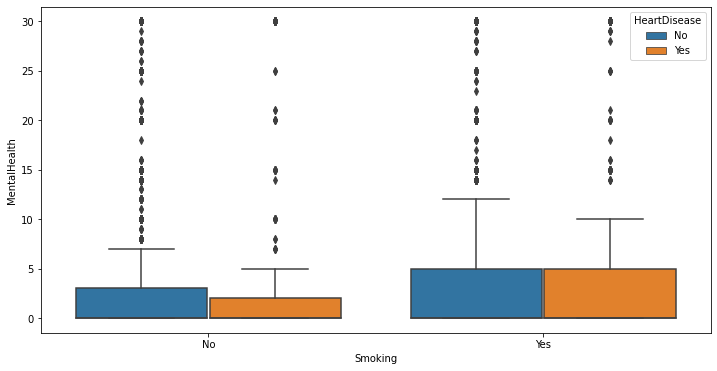

In [84]:
PLT.figure(figsize=(12,6))
SB.boxplot(x=X['Smoking'],y=X['MentalHealth'], hue=Y).legend(loc='upper right',title='HeartDisease')

# <font color="Brown">Stroke :</font>

In [85]:
X['Stroke'].describe()

count     9921
unique       2
top         No
freq      9520
Name: Stroke, dtype: object

In [86]:
X['Stroke'].isnull().sum()

0

In [87]:
X['Stroke'].value_counts()

No     9520
Yes     401
Name: Stroke, dtype: int64

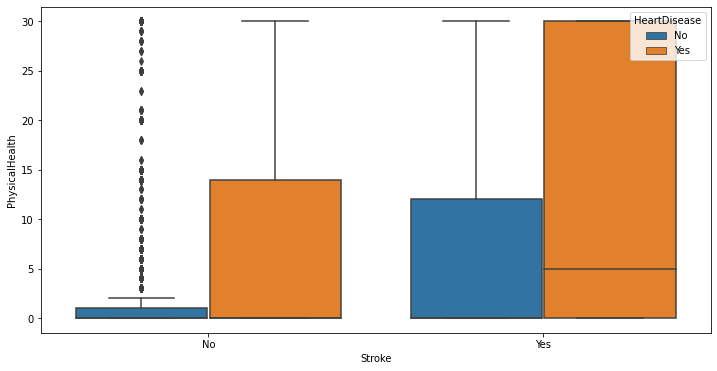

In [88]:
PLT.figure(figsize=(12,6))
SB.boxplot(x=X['Stroke'],y=X['PhysicalHealth'], hue=Y).legend(loc='upper right',title='HeartDisease')

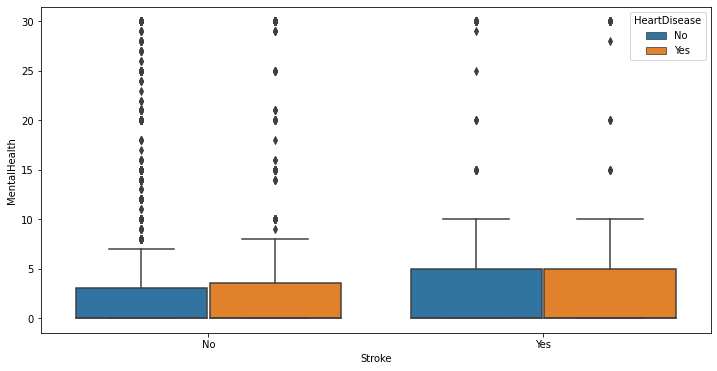

In [89]:
PLT.figure(figsize=(12,6))
SB.boxplot(x=X['Stroke'],y=X['MentalHealth'], hue=Y).legend(loc='upper right',title='HeartDisease')

# <font color="Green">One Hot Encode Categorical Label :</font>

In [90]:
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

def OHC_transformer_single_column(DF,columns):
    
    for column_name in columns:
        label_encoder = LabelEncoder()
        encoded = label_encoder.fit_transform(DF[column_name])
        labels =pd.Series(label_encoder.classes_)

        clmt = ColumnTransformer([(column_name,OneHotEncoder(),[0])], remainder='passthrough')
        clmt_fited_data = clmt.fit_transform(DF[[column_name]]) 
        clmt_fited_data = clmt_fited_data if type(clmt_fited_data)== np.ndarray else clmt_fited_data.toarray()  
        NDF = pd.DataFrame(clmt_fited_data,columns=[f'{column_name}_{x}' for x in labels])
        
        merged = DF.merge(NDF, left_index=True,right_index=True)
        merged = merged.drop(columns=[column_name])
        DF = merged
    return DF

In [91]:
X_OHC = OHC_transformer_single_column(X,CatCols) 
Y = DF.iloc[X_OHC.index]['HeartDisease']
Y_label_encoder = LabelEncoder()
Y_OHC = Y_label_encoder.fit_transform(Y)

In [92]:
NDF = pd.concat([X,Y],axis=1)
NDF_OHC = pd.concat([X_OHC,pd.DataFrame(Y_OHC,columns=['HeartDisease'])],axis=1)

# <font color="Green">Imbalance Data  :</font>

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

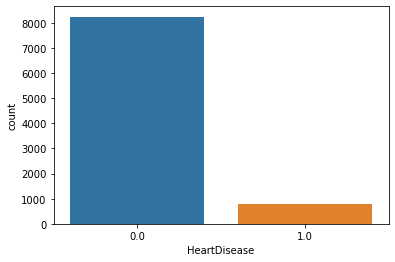

In [93]:
SB.countplot('HeartDisease',data=NDF_OHC)

In [94]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek 
from imblearn.under_sampling import TomekLinks

In [95]:
smote = SMOTE()
X_smote, Y_smote = smote.fit_resample(X_OHC,pd.DataFrame(Y_OHC,columns=['HeartDisease']))
DF_smote = pd.concat([X_smote,Y_smote],axis=1)

In [96]:
toml = TomekLinks()
X_toml, Y_toml = toml.fit_resample(X_smote,Y_smote)
DF_toml = pd.concat([X_toml,Y_toml],axis=1)

In [103]:
DF_toml

,AgeCategory,BMI,MentalHealth,PhysicalHealth,SleepTime,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,Stroke_No,...,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes,HeartDisease
0,72,26.260000,2.000000,5.000000,10.000000,1.000000,0.000000,1.0,0.0,1.0,...,0.000000,0.000000,1.000000,1.0,0.0,1.000000,0.000000,1.0,0.0,0
1,80,24.620000,0.000000,5.000000,6.000000,1.000000,0.000000,1.0,0.0,1.0,...,1.000000,0.000000,0.000000,1.0,0.0,1.000000,0.000000,1.0,0.0,0
2,67,26.610000,0.000000,0.000000,12.000000,1.000000,0.000000,1.0,0.0,1.0,...,1.000000,0.000000,0.000000,0.0,1.0,1.000000,0.000000,1.0,0.0,0
3,57,34.410000,30.000000,0.000000,9.000000,1.000000,0.000000,1.0,0.0,1.0,...,1.000000,0.000000,0.000000,1.0,0.0,1.000000,0.000000,1.0,0.0,0
4,72,22.600000,0.000000,0.000000,8.000000,0.000000,1.000000,1.0,0.0,1.0,...,0.000000,0.000000,1.000000,1.0,0.0,1.000000,0.000000,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16433,80,24.607797,0.000000,4.955330,5.522335,0.522335,0.477665,1.0,0.0,1.0,...,0.000000,0.000000,1.000000,1.0,0.0,1.000000,0.000000,1.0,0.0,1
16434,80,28.687562,0.000000,0.535420,8.000000,1.000000,0.000000,1.0,0.0,1.0,...,0.464580,0.000000,0.535420,1.0,0.0,1.000000,0.000000,0.0,1.0,1
16435,80,24.607093,0.000000,0.000000,8.000000,0.000000,1.000000,1.0,0.0,1.0,...,0.740915,0.259085,0.000000,1.0,0.0,0.740915,0.259085,1.0,0.0,1
16436,80,19.744436,5.006714,30.000000,7.003357,0.996643,0.003357,1.0,0.0,1.0,...,0.000000,0.000000,1.000000,1.0,0.0,1.000000,0.000000,1.0,0.0,1


 # <font color="Green">Normalize  :</font>

 # <font color="Green">feature reduction  :</font>

In [97]:
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE

In [98]:
from sklearn.decomposition import PCA,KernelPCA

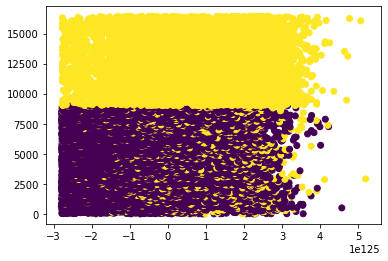

In [99]:
pca = KernelPCA(n_components=2,kernel='poly',random_state=3220,gamma=1,degree=50,coef0=100000)
XPCA = pca.fit_transform(DF_toml.iloc[:,:-1])
PLT.scatter(XPCA[:,0],range(0,len(XPCA)),c=DF_toml.iloc[:,-1])

 # <font color="Green">modeling  :</font>

In [102]:
ZX = pd.concat([pd.DataFrame(XPCA),DF_toml.iloc[:,-1]],axis=1)

X_train,X_test,Y_train,Y_test = train_test_split(ZX.iloc[:,:-1],ZX.iloc[:,-1],random_state=3020)

svm_classifier = SVC(C=1,kernel='rbf')
svm_classifier.fit(X_train,Y_train)
predicted = svm_classifier.predict(X_test)

print(metrics.classification_report(Y_test,predicted))
print(metrics.confusion_matrix(Y_test,predicted))

              precision    recall  f1-score   support

           0       0.77      0.61      0.68      2064
           1       0.68      0.81      0.74      2046

    accuracy                           0.71      4110
   macro avg       0.72      0.71      0.71      4110
weighted avg       0.72      0.71      0.71      4110

[[1267  797]
 [ 389 1657]]


In [104]:
X_train,X_test,Y_train,Y_test = train_test_split(DF_toml.iloc[:,:-1],DF_toml.iloc[:,-1],random_state=3020)

svm_classifier = SVC(C=1,kernel='rbf')
svm_classifier.fit(X_train,Y_train)
predicted = svm_classifier.predict(X_test)

print(metrics.classification_report(Y_test,predicted))
print(metrics.confusion_matrix(Y_test,predicted))

              precision    recall  f1-score   support

           0       0.76      0.62      0.68      2064
           1       0.68      0.80      0.73      2046

    accuracy                           0.71      4110
   macro avg       0.72      0.71      0.71      4110
weighted avg       0.72      0.71      0.71      4110

[[1284  780]
 [ 405 1641]]
